-------------------------------------------------------------------
# Homework set 10 - solution

 * **Author**: Balint Szoke
 * **UniID**: bs2574

> This notebook replicates Figure 9a of the paper *Globalization and Synchronization 
of Innovation Cycles* by Kiminori Matsuyama, Iryna Sushko and Laura Gardini

-------------------------------------------------------------------


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## The model

 - **Two structurally identical countries** with representative households supplying labor inelastically. Only possible asymmetry is in terms of labor endowment, $L_1$ and $L_2$. Labor share of country 1 is $s_1 = \frac{L_1}{L_1 + L_2}$ 
 - **Production sector** has two layers: 
    1. final good sector: competitive
    2. input variaties: mixture of competitive and monopolistic firms
        * markup $\frac{\sigma}{\sigma - 1}$, where $\sigma>1$ is the elasticity of subsitution between varieties
        * $\theta \equiv \left(\frac{\sigma}{\sigma - 1}\right)^{\sigma-1}$ is the relative revenue of competitive firms compared to monopolistic firms. It captures the degree of competition that innovators would have to face upon entering. With $\theta > 1$, a competitive variety is more discouraging to innovators than a monopolistic variety. $\theta\to 1$ as $\sigma \to 1$ and $\theta \to e$ as $\sigma\to\infty$
 - **Symmetric iceberg cost** $\tau$ implying the following *"measure of globalization"* $\rho \equiv \left(\frac{1}{\tau}\right)^{\sigma-1}$. High $\rho$ indicates more integrated countries. In particular, $\rho=0$ denotes autarchy, while $\rho \to 1$ is "full" integration. 
 - **Innovation and obsolescence:** in the input variety sector
    - monopoly over the innovation for only one period + free entry to innovation activities
    - all variaties (both new and old) are subject to an idiosyncratic obsolescence shock with probability $1-\delta \in (0,1)$
 - Normalized measures of "old" (=competitive) varieties in period $t$: $n_{t} = (n_{1,t}, n_{2,t})$
 
    
   --------------------

## Parameters of the dynamics for $n_t$:

 * $s \in \left[\frac{1}{2}, 1\right]$ : labor share of country 1 
 * $\theta\in (1, e)$  : degree of competition (high $\theta$ means more discouraging competition for the innovators). Default: $\theta = 2.5$ 
 * $\delta\in(0, 1)$ : the survival rate of the existing goods 
 * $\rho \in (0, 1)$ : measure of globalization

 * $n_0 = (n_{1,0}, n_{2,0})$ : initial conditions for the variaties in the two countries 

## Main steps to determine the dynamics:

 1. Determine $S_1(\rho)$ and $S_2(\rho)$
     \begin{align*}
         S_1(\rho) &\equiv \min\left\{\frac{s - \rho(1-s)}{1 - \rho} ,\quad 1\right\} \\
         S_2(\rho) &\equiv 1 - S_1(\rho)
     \end{align*}
     
 2. Calculate $h_1(n_2)$ and $h_2(n_1)$ explicitly from the quadratic equation. Since $h_i(n_j)>0$ we need only the positive root.
     \begin{align*}
          \frac{s}{h_1 + \rho n_2} + \frac{1-s}{h_1 + \frac{n_2}{\rho}} &= 1 \\
          h_1^2 + h_1\left[\rho n_2 + \frac{n_2}{\rho} - 1\right] + \left(n_2^2 - s\frac{n_2}{\rho} - (1-s)\rho n_2 \right) &= 0
     \end{align*}
    and
     \begin{align*}
          \frac{1- s}{h_2 + \rho n_1} + \frac{s}{h_2 + \frac{n_1}{\rho}} &= 1 \\
          h_2^2 + h_2\left[\rho n_1 + \frac{n_1}{\rho} - 1\right] + \left(n_1^2 - (1-s)\frac{n_1}{\rho} - s\rho n_1 \right) &= 0
     \end{align*}

 3. These objects determine four regions in the $(n_1, n_2)$ space:
    \begin{align*}
        D_{LL} &\equiv \left\{ (n_1, n_2) \in \mathbb{R}^2_{+} : n_{1}\leq S_1(\rho)\quad \text{and} \quad n_{2}\leq S_2(\rho) \right\} \\
        D_{HH} & \equiv \left\{ (n_1, n_2) \in \mathbb{R}^2_{+} : n_{1}\geq h_1 \quad \text{and} \quad n_{2}\geq h_2 \right\} \\
        D_{HL} & \equiv \left\{ (n_1, n_2) \in \mathbb{R}^2_{+} : n_{1}\geq S_1(\rho)\quad \text{and} \quad n_{2} \leq h_2 \right\} \\
        D_{LH}& \equiv \left\{ (n_1, n_2) \in \mathbb{R}^2_{+} : n_{1}\leq h_1\quad \text{and} \quad n_{2}\geq S_2(\rho) \right\}
    \end{align*} 
    
 4. The law of motion for $n_t = (n_{1t}, n_{2t})$ is then
      \begin{align*}
          n_{1t+1} = \left\{ \begin{array}{ll}
          \delta \left(\theta S_1(\rho) + (1-\theta)n_{1t} \right) & \text{if} \quad n_t\in D_{LL} \\
          \delta n_{1t} & \text{if} \quad n_t\in D_{HH} \\
          \delta n_{1t} & \text{if} \quad n_t\in D_{HL} \\
          \delta \left(\theta h_1(n_{2t}) + (1-\theta)n_{1t} \right) & \text{if} \quad n_t\in D_{LH} 
          \end{array}\right.
      \end{align*}
      
      and
      \begin{align*}
         n_{2t+1} = \left\{ \begin{array}{ll}
         \delta \left(\theta S_2(\rho) + (1-\theta)n_{2t} \right) & \text{if} \quad n_t\in D_{LL} \\
          \delta n_{2t} & \text{if} \quad n_t\in D_{HH} \\
          \delta \left(\theta h_2(n_{1t}) + (1-\theta)n_{2t} \right) & \text{if} \quad n_t\in D_{HL} \\
          \delta n_{2t} & \text{if} \quad n_t\in D_{LH} 
          \end{array}\right.
      \end{align*}
      
  ---------------------------------

In [2]:
class Matsuyama_dynamics(object):
    """
    This class implements the law of motion for n_t and simulates it following 
    the steps listed above based on the paper Matsuyama et al (2015).
    
    Arguments:
    ----------------
        s     : float in [.5, 1]
                labor share of country 1 
                
        theta : float in (1, e)
                degree of competition
        
        delta : float in (0, 1)
                survival rate of existing varieties
        
        rho   : float in (0, 1)
                measure of globalization
        
    """   
    
    def __init__(self, s, theta, delta, rho):
        
        self.s, self.theta = s, theta  
        self.delta, self.rho = delta, rho
        
        
    def S_boundaries(self):
        """
        This function calculates S_1(rho) and S_2(rho)
        """
        S1 = min((self.s - self.rho * (1 - self.s)) / (1 - self.rho), 1)
        S2 = 1 - S1
        
        return S1, S2
    
    def h_boundaries(self, n1, n2):
        '''
        This function calculates h_1 and h_2 explicitly from the quadratic equations
        given above. Since we know that h_1, h_2 > 0, we only need the positive roots.
        
        The equations have the form            
            h^2 + B*h + C = 0
        therefore
            h* = (-B + sqrt(B^2 - 4AC))/2A
        '''
        s, rho = self.s, self.rho
        
        B1 = rho * n2 + n2 / rho - 1 
        B2 = rho * n1 + n1 / rho - 1
        C1 = n2**2 - s * n2 / rho - (1 - s) * rho * n2
        C2 = n1**2 - (1-s) * n1 / rho - s * rho * n1
        
        h1 = (-B1 + np.sqrt(B1**2 - 4*C1))/2
        h2 = (-B2 + np.sqrt(B2**2 - 4*C2))/2
                    
        return h1, h2
    
    def next_period_n(self, n1, n2):
        """
        This function returns the next period n given the current value
        """
        
        theta, delta = self.theta, self.delta
        S1, S2 = self.S_boundaries()
        h1, h2 = self.h_boundaries(n1, n2)
        
        if n1 <= S1 and n2 <= S2:
            n1_next = delta * (theta * S1 + (1 - theta) * n1)
            n2_next = delta * (theta * S2 + (1 - theta) * n2)
        
        elif n1 >= h1 and n2 >= h2:
            n1_next = delta * n1
            n2_next = delta * n2
        
        elif n1 >= S1 and n2 <= h2:
            n1_next = delta * n1
            n2_next = delta * (theta * h2 + (1 - theta) * n2)
        
        elif n1 <= h1 and n2 >= S2:
            n1_next = delta * (theta * h1 + (1 - theta) * n1)
            n2_next = delta * n2

        return np.asarray([n1_next, n2_next])
    
    def simulate_n_path(self, T, n0_1, n0_2):
        """
        Simulate a path of length T+1 (starting with the initial value n0_1 and n0_2) 
        for the n vector.
        """
        
        n_path = np.zeros((2, T + 1))
        n_path[:, 0] = np.asarray([n0_1, n0_2])
        
        for t in range(T):
            n_path[:, t + 1] = self.next_period_n(n_path[0, t], n_path[1, t])
        
        return n_path
    
    def time_to_synchronize(self, n0_1, n0_2, max_simul = 500):
        """
        Poor man's way of determining the number of periods until syncronization.
        With the while loop we can avoid drawing unnecessarily long simulations.
        """
        
        n1, n2 = n0_1, n0_2
        syncronized = np.isclose(n1, n2)
        stopping_time = 0
        
        while syncronized == False and stopping_time <= max_simul:

            stopping_time += 1            
            n1, n2 = self.next_period_n(n1, n2)
            syncronized = np.isclose(n1, n2)
        
        if stopping_time > max_simul:
            return np.nan
        else:
            return stopping_time        

## Plotting

Parameter values:

In [3]:
s = .5
theta = 2.5
delta = .7
rhos = [.2, .4, .6, .8]

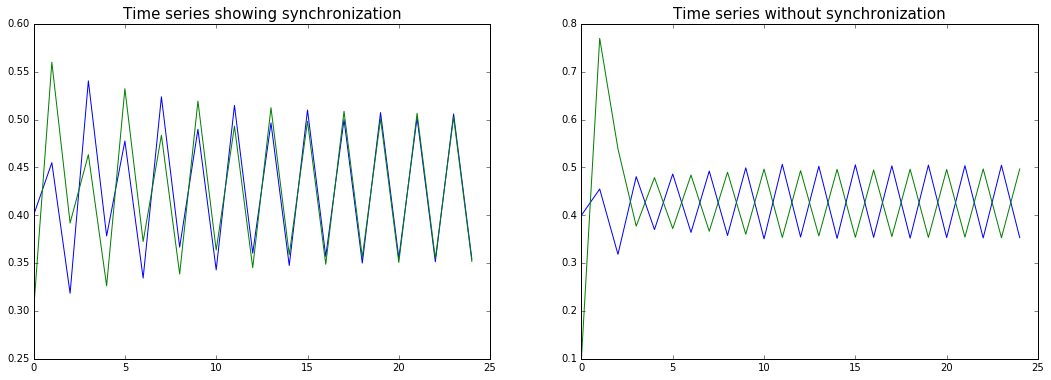

In [4]:
model = Matsuyama_dynamics(s, theta, delta, rhos[2])

fig1, ax = plt.subplots(1,2, figsize = (18, 6))
ax[0].plot(model.simulate_n_path(24, .4, .3).T)
ax[0].set_title("Time series showing synchronization", fontsize = 15)
ax[1].plot(model.simulate_n_path(24, .4, .1).T)
ax[1].set_title("Time series without synchronization", fontsize = 15)


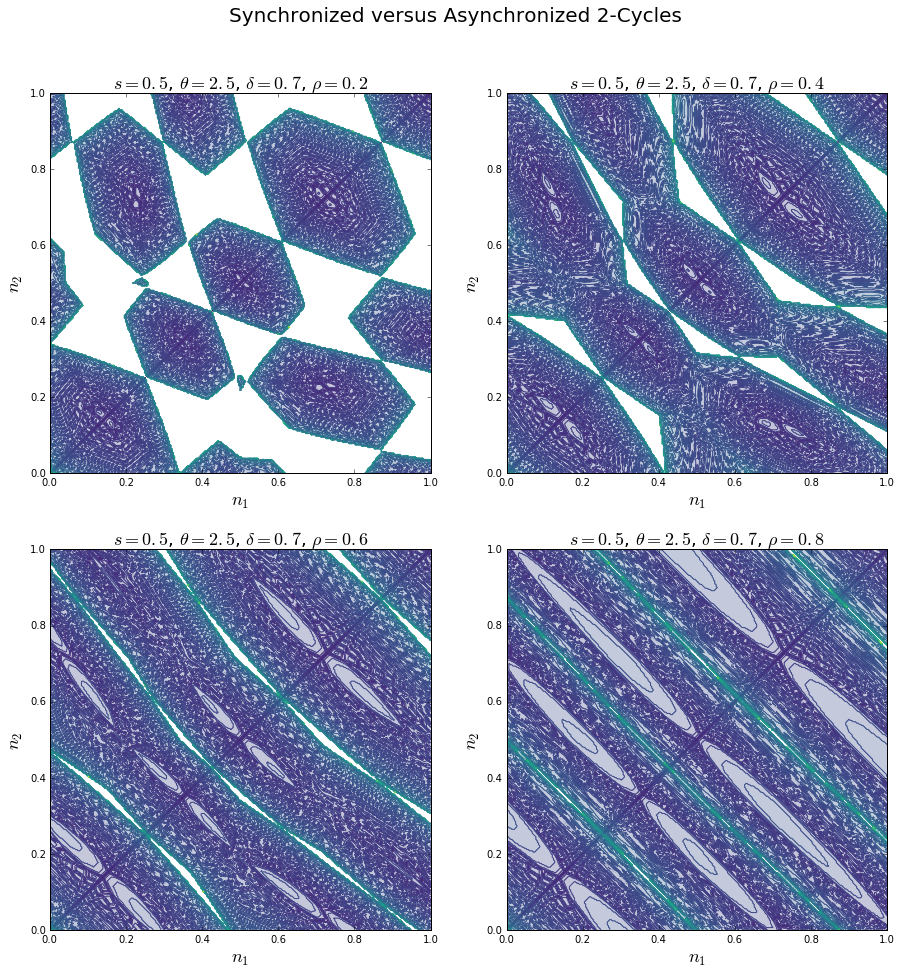

In [5]:
numb_of_grid = 300
n_grid = np.linspace(0.001, 1, numb_of_grid)
time_to_sync = np.zeros((numb_of_grid, numb_of_grid, 4))

fig, axes = plt.subplots(2, 2, figsize = (15, 15))
levels = np.linspace(np.sqrt(0), np.sqrt(300), 50)**2

for ax, rho, k in zip(axes.flat, rhos, range(4)):
    
    model = Matsuyama_dynamics(s, theta, delta, rho)

    for i in range(numb_of_grid):
        for j in range(numb_of_grid):
            time_to_sync[i][j][k] = model.time_to_synchronize(n_grid[i], n_grid[j])

    ax.contour(n_grid, n_grid, time_to_sync[:, :, k], cmap = plt.cm.viridis, levels = levels)
    ax.contourf(n_grid, n_grid, time_to_sync[:, :, k], alpha = .3, cmap = plt.cm.viridis, levels = levels)
    ax.set_ylabel(r'$n_2$', fontsize = 18)
    ax.set_xlabel(r'$n_1$', fontsize = 18)
    ax.set_title(r'$s = {}$, $\theta={}$, $\delta={}$, $\rho={}$'.format(s, theta, delta, rho), fontsize = 18)
    fig.suptitle("Synchronized versus Asynchronized 2-Cycles", fontsize = 20)
plt.show()